Sales Forecast - MSE: 4136255.285966012
Sales Forecast - R-squared: 0.3836138394856814


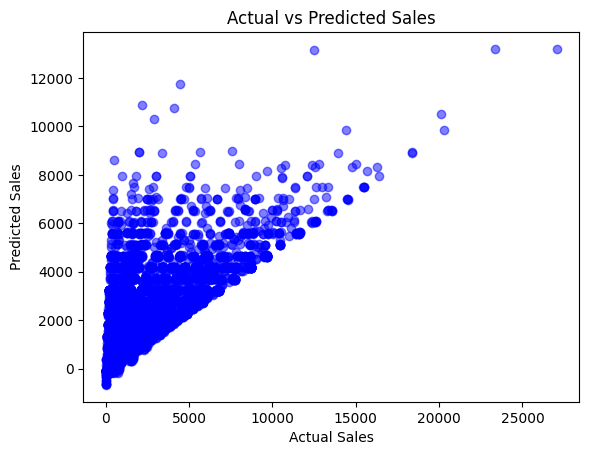

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("retail_sales.csv")

df = pd.get_dummies(df, columns=['Day of the Week'], drop_first=True)

# Define features and target variable
X_sales = df[['Discount Percentage', 'Marketing Spend (USD)', 'Units Sold'] + 
             [col for col in df.columns if "Day of the Week_" in col]]  # Include encoded columns

y_sales = df['Sales Revenue (USD)']

# Split dataset into training and testing sets
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42)

# Train the model
model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)

# Predictions
y_pred_sales = model_sales.predict(X_test_sales)

# Evaluate model
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)

print(f"Sales Forecast - MSE: {mse_sales}")
print(f"Sales Forecast - R-squared: {r2_sales}")

# Plot Actual vs Predicted Sales
plt.scatter(y_test_sales, y_pred_sales, color='blue', alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset and select only required columns
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df.iloc[:, [0, 1]]  # Keep only the first two columns
df.columns = ["label", "message"]

# Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
corpus = []
for msg in df['message']:
    msg = re.sub('[^a-zA-Z]', ' ', msg).lower().split()
    msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
    corpus.append(" ".join(msg))

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
y = df['label'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maheen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("churn.csv")

# Drop unnecessary columns
df = df.drop(columns=['CustomerID'])

# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9433786407766991
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6793
           1       0.93      0.96      0.94      6082

    accuracy                           0.94     12875
   macro avg       0.94      0.94      0.94     12875
weighted avg       0.94      0.94      0.94     12875



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("creditcard.csv")

# Reduce dataset size for faster processing
df = df.sample(frac=0.1, random_state=42)

# Define features and target variable
X = df.drop(columns=['Class'])  # All columns except target
y = df['Class']  # Target column (fraud or not)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
